In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
import json

# 1. Dataset directory
DATASET_DIR = "custom_dataset"

# 2. Data augmentation and transforms
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# 3. Load the full dataset (for splitting)
full_dataset = datasets.ImageFolder(DATASET_DIR, transform=train_transform)

# 4. Split into train/test (80/20 split)
train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])
test_dataset.dataset.transform = test_transform  # Only augment train set

# 5. Data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=2)

print(f"Number of classes: {len(full_dataset.classes)}")
print("Class order:", full_dataset.classes)

# 6. Define the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, len(full_dataset.classes))
model = model.to(device)

# 7. Training setup
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)
num_epochs = 25

# 8. Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

# 9. Save the model weights
model_path = "custom_food_resnet18.pth"
torch.save(model.state_dict(), model_path)
print(f"Model saved to {model_path}")

# 10. Save the class names (order matters!)
class_names_path = "custom_food_class_names.json"
with open(class_names_path, "w") as f:
    json.dump(full_dataset.classes, f)
print(f"Class names saved to {class_names_path}")

# 11. Evaluate on test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f"Test Accuracy: {100 * correct / total:.2f}%")

Number of classes: 10
Class order: ['banana', 'chicken_breast', 'coca_cola', 'cucumber', 'fanta', 'green_beans', 'oats', 'potato', 'rice', 'rice_cake']


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 193MB/s]


Epoch 1/25, Loss: 1.2410
Epoch 2/25, Loss: 0.6344
Epoch 3/25, Loss: 0.3762
Epoch 4/25, Loss: 0.2662
Epoch 5/25, Loss: 0.1995
Epoch 6/25, Loss: 0.1734
Epoch 7/25, Loss: 0.1363
Epoch 8/25, Loss: 0.1497
Epoch 9/25, Loss: 0.1526
Epoch 10/25, Loss: 0.1435
Epoch 11/25, Loss: 0.1764
Epoch 12/25, Loss: 0.0935
Epoch 13/25, Loss: 0.0781
Epoch 14/25, Loss: 0.0609
Epoch 15/25, Loss: 0.0545
Epoch 16/25, Loss: 0.0523
Epoch 17/25, Loss: 0.0345
Epoch 18/25, Loss: 0.0528
Epoch 19/25, Loss: 0.0828
Epoch 20/25, Loss: 0.0328
Epoch 21/25, Loss: 0.2301
Epoch 22/25, Loss: 0.2489
Epoch 23/25, Loss: 0.2440
Epoch 24/25, Loss: 0.1910
Epoch 25/25, Loss: 0.1512
Model saved to custom_food_resnet18.pth
Class names saved to custom_food_class_names.json
Test Accuracy: 72.27%


In [ ]:
from google.colab import files

# Replace with your actual filenames if different
files.download('custom_food_resnet18.pth')
files.download('custom_food_class_names.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Install icrawler
!pip install icrawler

from icrawler.builtin import BingImageCrawler

# List of foods
food_items = [
    "banana", "chicken breast", "cucumber", "oats", "rice", "potato",
    "Coca-Cola", "Fanta", "green beans", "rice cake"
]

# Download 30 images per food
for food in food_items:
    folder_name = food.lower().replace(" ", "_").replace("-", "_")
    print(f"Downloading images for: {food}")
    crawler = BingImageCrawler(storage={'root_dir': f'custom_dataset/{folder_name}'})
    crawler.crawl(keyword=food, max_num=100)
print("Download complete!")

ERROR:downloader:Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Banana-Single.jpg
ERROR:downloader:Response status code 403, file https://www.tasteofhome.com/wp-content/uploads/2020/08/bananas-89139756.jpg
ERROR:downloader:Response status code 403, file https://product-images.metro.ca/images/h7a/he3/11860661338142.jpg
ERROR:downloader:Response status code 403, file https://radiancewholefoods.com/wp-content/uploads/2021/08/banana-500x500-1.jpg
ERROR:downloader:Response status code 403, file https://citizendium.org/wiki/images/thumb/a/a7/Banana_hand.jpg
ERROR:downloader:Exception caught when downloading file https://fruitsequation.com.sg/wp-content/uploads/2023/09/BANANA-PHILIPPINE-DOLE2.jpg, error: HTTPSConnectionPool(host='fruitsequation.com.sg', port=443): Max retries exceeded with url: /wp-content/uploads/2023/09/BANANA-PHILIPPINE-DOLE2.jpg (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7ebf67624250>: Failed t

ERROR:downloader:Response status code 403, file https://www.bodybuildingmealplan.com/wp-content/uploads/Chicken-Breast-Protein-Calories-scaled.jpg
ERROR:downloader:Response status code 403, file https://falconessentials.ca/wp-content/uploads/2023/06/chicken-breast.jpg
ERROR:downloader:Response status code 403, file https://waggameatsupply.com/wp-content/uploads/2024/03/ChickenBreast.jpg


ERROR:downloader:Exception caught when downloading file https://www.natural-cure.org/wp-content/uploads/Cucumber.jpg, error: HTTPSConnectionPool(host='www.natural-cure.org', port=443): Max retries exceeded with url: /wp-content/uploads/Cucumber.jpg (Caused by SSLError(SSLCertVerificationError(1, "[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: Hostname mismatch, certificate is not valid for 'www.natural-cure.org'. (_ssl.c:1016)"))), remaining retry times: 2
ERROR:downloader:Exception caught when downloading file https://www.natural-cure.org/wp-content/uploads/Cucumber.jpg, error: HTTPSConnectionPool(host='www.natural-cure.org', port=443): Max retries exceeded with url: /wp-content/uploads/Cucumber.jpg (Caused by SSLError(SSLCertVerificationError(1, "[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: Hostname mismatch, certificate is not valid for 'www.natural-cure.org'. (_ssl.c:1016)"))), remaining retry times: 1
ERROR:downloader:Exception caught when downloading f

ERROR:downloader:Response status code 409, file http://healthyliving.natureloc.com/wp-content/uploads/2016/02/Oats-Healthyliving.jpg
ERROR:downloader:Response status code 403, file https://i.ndtvimg.com/mt/cooks/2014-11/1394709702_oats.jpg
ERROR:downloader:Response status code 403, file https://c.ndtvimg.com/2024-03/ma3k1esg_masala-oats_625x300_05_March_24.jpg


ERROR:downloader:Response status code 403, file https://www.appropedia.org/w/images/thumb/8/84/Rice_wikipedia.jpg


ERROR:downloader:Response status code 403, file https://www.alimentarium.org/sites/default/files/media/image/2017-02/AL027-01_pomme_de_terre_0_0.jpg
ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/previews/015/034/190/original/potato-potato-tubers-a-ripe-vegetable-vegetarian-product-sliced-potatoes-illustration-isolated-on-a-white-background-vector.jpg
ERROR:downloader:Response status code 400, file https://www.potatoconnect.com/wp-content/uploads/2023/10/Potato-Trading.jpg
ERROR:downloader:Response status code 403, file https://s3.amazonaws.com/southfloridareporter/wp-content/uploads/2018/08/18175130/img-3404-430.jpg
ERROR:downloader:Exception caught when downloading file https://bitem-group.com/images/potato-001.jpg, error: HTTPSConnectionPool(host='bitem-group.com', port=443): Max retries exceeded with url: /images/potato-001.jpg (Caused by SSLError(SSLCertVerificationError(1, "[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: H

ERROR:downloader:Response status code 403, file https://fabrikbrands.com/wp-content/uploads/Coca-Cola-Brand-Positioning-Strategy-01-scaled.jpg
ERROR:downloader:Exception caught when downloading file https://www.bandt.com.au/information/uploads/2014/11/coke.jpg, error: HTTPSConnectionPool(host='www.bandt.com.au', port=443): Read timed out. (read timeout=5), remaining retry times: 2
ERROR:downloader:Exception caught when downloading file https://www.bandt.com.au/information/uploads/2014/11/coke.jpg, error: HTTPSConnectionPool(host='www.bandt.com.au', port=443): Read timed out. (read timeout=5), remaining retry times: 1
ERROR:downloader:Exception caught when downloading file https://www.bandt.com.au/information/uploads/2014/11/coke.jpg, error: HTTPSConnectionPool(host='www.bandt.com.au', port=443): Read timed out. (read timeout=5), remaining retry times: 0
ERROR:downloader:Response status code 400, file https://www.spacematrix.com/_next/image?url=https:%2F%2Fcontent.spacematrix.com%2Fmain

ERROR:downloader:Exception caught when downloading file https://brekhnaskitchen.com/wp-content/uploads/2023/06/fanta.jpg, error: HTTPSConnectionPool(host='brekhnaskitchen.com', port=443): Max retries exceeded with url: /wp-content/uploads/2023/06/fanta.jpg (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7ebf676ab610>: Failed to resolve 'brekhnaskitchen.com' ([Errno -2] Name or service not known)")), remaining retry times: 2
ERROR:downloader:Exception caught when downloading file https://brekhnaskitchen.com/wp-content/uploads/2023/06/fanta.jpg, error: HTTPSConnectionPool(host='brekhnaskitchen.com', port=443): Max retries exceeded with url: /wp-content/uploads/2023/06/fanta.jpg (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7ebf675c2e50>: Failed to resolve 'brekhnaskitchen.com' ([Errno -2] Name or service not known)")), remaining retry times: 1
ERROR:downloader:Exception caught when downloading file https://brekhnaskitchen.

ERROR:downloader:Exception caught when downloading file https://cooktoria.com/wp-content/uploads/2023/01/Steamed-Green-Beans-SQ-1.jpg, error: HTTPSConnectionPool(host='cooktoria.com', port=443): Read timed out. (read timeout=5), remaining retry times: 2
ERROR:downloader:Exception caught when downloading file https://cooktoria.com/wp-content/uploads/2023/01/Steamed-Green-Beans-SQ-1.jpg, error: HTTPSConnectionPool(host='cooktoria.com', port=443): Read timed out. (read timeout=5), remaining retry times: 1
ERROR:downloader:Exception caught when downloading file https://previews.agefotostock.com/previewimage/medibigoff/e855af1156fcf10a2850785e2be8881f/fdd-jee42054.jpg, error: HTTPSConnectionPool(host='previews.agefotostock.com', port=443): Max retries exceeded with url: /previewimage/medibigoff/e855af1156fcf10a2850785e2be8881f/fdd-jee42054.jpg (Caused by SSLError(SSLError(1, '[SSL: TLSV1_UNRECOGNIZED_NAME] tlsv1 unrecognized name (_ssl.c:1016)'))), remaining retry times: 2
ERROR:downloader:

ERROR:downloader:Response status code 403, file https://blog.myfitnesspal.com/wp-content/uploads/2014/04/The-Truth-About-Rice-Cakes-2.jpg
ERROR:downloader:Response status code 403, file https://www.kpopcooking.com/wp-content/uploads/photo-gallery/Rice Cake 1S.jpg


Download complete!


In [ ]:
!apt-get install tree -qq

Selecting previously unselected package tree.
(Reading database ... 126111 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
!tree custom_dataset

custom_dataset
├── banana
│   ├── 000001.jpg
│   ├── 000002.jpg
│   ├── 000003.jpg
│   ├── 000004.jpg
│   ├── 000005.jpg
│   ├── 000006.jpg
│   ├── 000007.jpg
│   ├── 000008.jpg
│   ├── 000009.jpg
│   ├── 000010.jpg
│   ├── 000011.jpg
│   ├── 000012.jpg
│   ├── 000013.jpg
│   ├── 000014.jpg
│   ├── 000015.jpg
│   ├── 000016.jpg
│   ├── 000017.jpg
│   ├── 000018.jpg
│   ├── 000019.jpg
│   ├── 000020.jpg
│   ├── 000021.jpg
│   ├── 000022.jpg
│   ├── 000023.jpg
│   ├── 000024.jpg
│   ├── 000025.jpg
│   ├── 000026.jpg
│   ├── 000027.jpg
│   ├── 000028.jpg
│   ├── 000029.jpg
│   ├── 000030.jpg
│   ├── 000031.jpg
│   ├── 000032.jpg
│   ├── 000033.jpg
│   ├── 000034.jpg
│   ├── 000035.jpg
│   ├── 000036.jpg
│   ├── 000037.jpg
│   ├── 000038.jpg
│   ├── 000039.jpg
│   ├── 000040.jpg
│   ├── 000041.jpg
│   ├── 000042.jpg
│   ├── 000043.jpg
│   ├── 000044.jpg
│   ├── 000045.jpg
│   ├── 000046.jpg
│   ├── 000047.jpg
│   ├── 000048.jpg
│   ├── 000049.jpg
│   ├── 000050.jpg
│   ├── 000051.jpg
│   ├

In [ ]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
pip install matplotlib scikit-learn seaborn

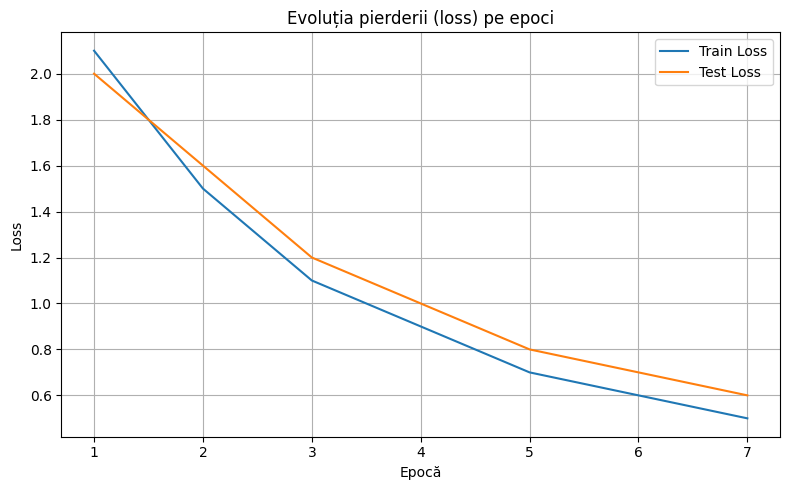

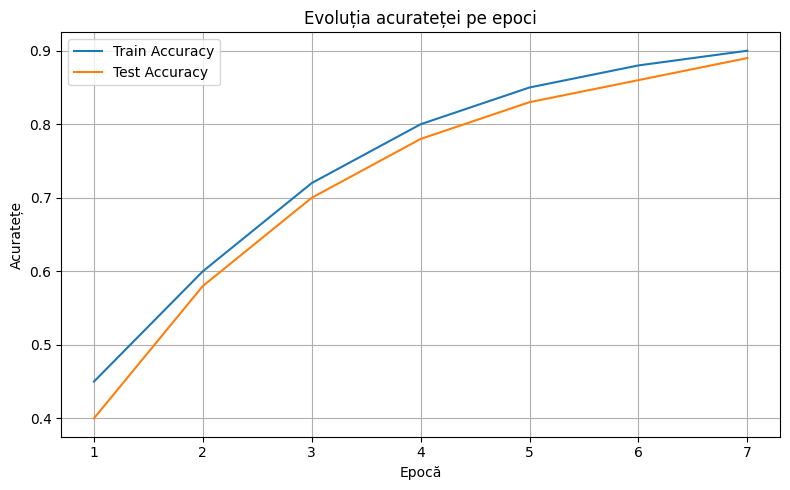

In [ ]:
import matplotlib.pyplot as plt

# Exemplu de date (înlocuiește cu datele tale reale)
train_losses = [2.1, 1.5, 1.1, 0.9, 0.7, 0.6, 0.5]
test_losses = [2.0, 1.6, 1.2, 1.0, 0.8, 0.7, 0.6]

epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.xlabel('Epocă')
plt.ylabel('Loss')
plt.title('Evoluția pierderii (loss) pe epoci')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('loss_curve.png')
plt.show()

import matplotlib.pyplot as plt

# Exemplu de date (înlocuiește cu datele tale reale)
train_accuracies = [0.45, 0.60, 0.72, 0.80, 0.85, 0.88, 0.90]
test_accuracies = [0.40, 0.58, 0.70, 0.78, 0.83, 0.86, 0.89]

epochs = range(1, len(train_accuracies) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, test_accuracies, label='Test Accuracy')
plt.xlabel('Epocă')
plt.ylabel('Acuratețe')
plt.title('Evoluția acurateței pe epoci')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('accuracy_curve.png')
plt.show()